<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b>Parcial Segundo Corte Introducción a ML </b>
<br>
<i><b>Estudiantes:<br></b>
* </i> Juan Camilo De Los Ríos Hernández. <br>
* </i> Johan Yesid Moreno Forero.
<br>
<i><b>Docente:</b></i> John Corredor, PhD.
<br>
<i><b>Asignatura:</b></i> Machine Learning Computación Avanzada
<br>
24/10/2021
<br>
</FONT>
</div>

# **Preparación de los datos de entrada**

*Importación de las bibliotecas necesarias*

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import sys
from io import StringIO

*Se prepara el link en el cual está el dataset a utilizar*

In [120]:
#El link usualmente genera errores (Error 404)
url = 'https://raw.githubusercontent.com/corredor-john/universidadsergioarboleda/main/dataWineQuality.csv'
urlAux = '/content/drive/MyDrive/Machine learning/winedata.csv'

*Por medio de pandas se lee el dataset y se comprueba imprimiendo los primeros cinco datos del dataframe*

In [121]:
try:
  df_wineNorm = pd.read_csv(url)
  print("Usando el csv de git")
except:
  df_wineNorm = pd.read_csv(urlAux, names=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'])
  print("Usando el fichero en drive")
df_wineNorm.head()

Usando el fichero en drive


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


*Se verifica que no hayan valores nulos*

In [122]:
df_wineNorm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


*Se calculan los valores estadísticos para cada una de las características y la variable dependiente*

In [123]:
df_wineNorm.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


*Se mueve la columna dependiente a la primera posición*

In [124]:
cols = list(df_wineNorm)
cols[0], cols[11] = cols[11], cols[0]
df_wineNorm = df_wineNorm[cols]
df_wineNorm

,quality,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,fixed acidity
0,5,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,7.4
1,5,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,7.8
2,5,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,7.8
3,6,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,11.2
4,5,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,5,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,6.2
1595,6,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,5.9
1596,6,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.3
1597,5,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.9


# **Regresión Lineal**

## **Regresión lineal clásica**

*En primera instancia, se realizará la regresión lineal tradicional utilizando la biblioteca de SKlearn (LinearRegression) con el fin de comparar los valores a cuando esta se realiza con un gradiente estocástico. Con base en ello, al igual que el ejercicio realizado en clase, se normalizarán los datos*

*Se crea la instancia de la regresión lineal*

In [125]:
linear_regression = LinearRegression(normalize=True)

*Se separan los datos por variables independientes y dependientes*

In [126]:
Ymuestra = df_wineNorm['quality'].to_numpy()
Ymuestra

array([5, 5, 5, ..., 6, 5, 6])

In [127]:
Xmuestra = df_wineNorm[['volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','fixed acidity']].to_numpy()
Xmuestra

array([[ 0.7  ,  0.   ,  1.9  , ...,  0.56 ,  9.4  ,  7.4  ],
       [ 0.88 ,  0.   ,  2.6  , ...,  0.68 ,  9.8  ,  7.8  ],
       [ 0.76 ,  0.04 ,  2.3  , ...,  0.65 ,  9.8  ,  7.8  ],
       ...,
       [ 0.51 ,  0.13 ,  2.3  , ...,  0.75 , 11.   ,  6.3  ],
       [ 0.645,  0.12 ,  2.   , ...,  0.71 , 10.2  ,  5.9  ],
       [ 0.31 ,  0.47 ,  3.6  , ...,  0.66 , 11.   ,  6.   ]])

*Se realiza la división de los datos en datos de testeo y entrenamiento*

In [128]:
X_train, X_test, y_train, y_test = train_test_split(Xmuestra, Ymuestra, train_size = 0.8)
print("X_train ->\n",X_train.shape)
print("y_train ->\n",y_train.shape)
print("X_test ->\n",X_test.shape)
print("y_test ->\n",y_test.shape)

X_train ->
 (1279, 11)
y_train ->
 (1279,)
X_test ->
 (320, 11)
y_test ->
 (320,)


*Se realiza el 'fit' de la regresión con los datos de entrenamiento*

In [129]:
linear_regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

*Se realizan las predicciones para el conjunto tanto de entrenamiento, como de testeo. Esto con el fin de probar que tan bueno es el modelo prediciendo datos que conoce y los que no*

In [130]:
predicciones_train = linear_regression.predict(X_train)
predicciones_test = linear_regression.predict(X_test)

*Se obtienen las métricas de rendimiento del modelo*

In [131]:
print("Raíz del error cuadrático medio (Train)->", np.sqrt(mean_squared_error(predicciones_train, y_train)))
print("Error cuadrático medio (Train)->", mean_squared_error(predicciones_train, y_train))
print("Raíz del error cuadrático medio (Test)->", np.sqrt(mean_squared_error(predicciones_test, y_test)))
print("Error cuadrático medio (Test)->", mean_absolute_error(predicciones_test, y_test))
print("Puntuación R2 (Train) -> ", r2_score(predicciones_train, y_train))
print("Puntuación R2 (Test) -> ", r2_score(predicciones_test, y_test))

Raíz del error cuadrático medio (Train)-> 0.6396022444989123
Error cuadrático medio (Train)-> 0.40909103116804646
Raíz del error cuadrático medio (Test)-> 0.6715234414169576
Error cuadrático medio (Test)-> 0.5319052849687422
Puntuación R2 (Train) ->  -0.7437455049630908
Puntuación R2 (Test) ->  -0.6956303440443876


*Se imprimen los coeficientes obtenidos por la regresión lineal*

In [132]:
linear_regression.intercept_

18.84383579469553

In [133]:
linear_regression.coef_

array([-1.10865396e+00, -2.11285664e-01,  2.01922422e-02, -2.05769396e+00,
        3.85880334e-03, -3.77975607e-03, -1.43351605e+01, -5.07447834e-01,
        8.62962147e-01,  2.81021909e-01,  1.72572879e-02])

## **Regresión lineal con gradiente descendiente estocástico**

*Se importan las bibliotecas necesarias para el gradiente descendiente*

In [134]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

*Se estandarizan los datos ya que como el dataset es muy pequeño, con SKlearn tiende a crearse mucho ruido con esta biblioteca y se soluciona de esta manera*

In [135]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
Y_scaled = scaler.fit_transform(y_train.reshape(-1, 1))

*Se crea una variable en la que se guardará toda la historia de las impresiones de consola (stdout), de manera que, ya que con el parametro "verbose" de el SDGRegressor, nos muestra la pérdida en cada una de las épocas del gradiente, de esta manera se puede mantener la trazabilidad de los costos a lo largo de las iteraciones*

In [136]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

*Se crea el SDGRegressor con una taza de aprendizaje del 10%*

In [137]:
sgd_reg = SGDRegressor(alpha = 0.1, verbose=1)

*Se hace el 'fit' al modelo*

In [138]:
sgd_reg.fit(X_scaled, y_train)

SGDRegressor(alpha=0.1, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=1,
             warm_start=False)

*Se imprimen los coeficientes dados por el modelo*

In [139]:
sgd_reg.coef_

array([-0.17718264, -0.00333806,  0.04237501, -0.08990503,  0.03254597,
       -0.10345956, -0.04459798, -0.05907332,  0.13626398,  0.24911169,
        0.05376423])

*Se realiza el filtrado de lo que ha registrado la variable de las impresiones en la consola para verificar los costos obtenidos en el SDGRegressor*

In [140]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

*Impresión de los costos*

In [141]:
print("Costos ->\n",loss_list)

Costos ->
 [2.123033, 0.221905, 0.208995, 0.208909, 0.208455, 0.207586, 0.2077, 0.208317]


*Graficación de los costos*

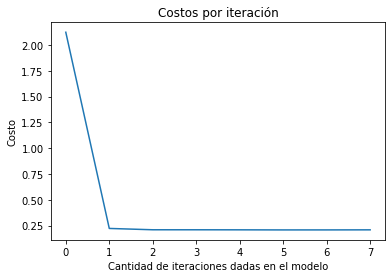

In [142]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel("Cantidad de iteraciones dadas en el modelo")
plt.ylabel("Costo")
plt.title("Costos por iteración")
plt.show()
plt.close()

# **Conclusiones**

En conlusión despues de realizar la implementación en otro lenguaje de programación se puede observar que lo que se realizo en el QT creator se podria considerar datos de prueba los cuales se realizaron gracias a las formulas y funciones implementadas a mano, donde existe un error dentro de estos cálculos, si embargo en la implementación de python gracias a sus numerosas bibiliotecas completas, llenas de conocimiento y poder las cuales nos permiten verificar de una forma clara y consiza si dichos datos son correctos o se asemejan minimanete o por el contrario estan totalmente errados.
Como se puede observar los datos que resultaron con la comprobación en python son muy parecidos. Tienen algunas discordancias, esto ya que en python al utilizar bibiliotecas los cálculos son muy precisos, mucho más que con función realizadas a mano. 
Para finalizar esta demostración permitio realizar una revisión e identificación de brechas de conocimiento, lo que permitio reforzar lo que se realizo en clase y cerrar esas pequeñas brechas al tener que realizarlo por nuestra cuenta.